In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

# Image Acquisition


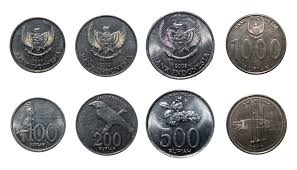

In [ ]:
# Path gambar yang ingin dibaca
image_path = "koin.jpg"

# Baca gambar menggunakan OpenCV
image = cv2.imread(image_path)

# Periksa apakah gambar berhasil dibaca
if image is None:
    print("Gagal membaca gambar")
else:
    # Tampilkan gambar
    cv2_imshow(image)

# Pre Processing

Gambar Awal:


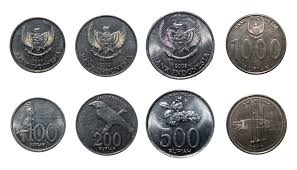

Gambar Skala Keabuan:


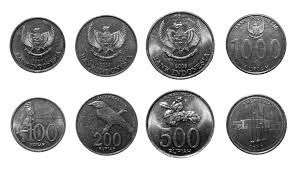

Gambar Gaussian Blur:


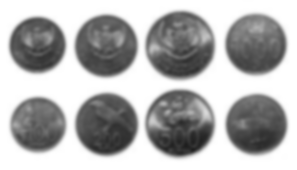

Gambar setelah Proses Thresholding:


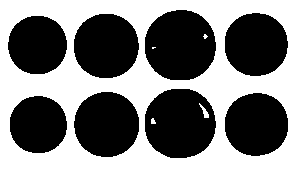

In [ ]:
def preprocess_image(image):
    # Konversi gambar ke skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # proses dengan gausian blur
    blurred = cv2.GaussianBlur(gray_image, (9, 9), 0)

    average_gray = np.mean(blurred)

    # Lakukan proses thresholding
    _, threshold_image = cv2.threshold(blurred, average_gray, 255, cv2.THRESH_BINARY)

    kernel = np.ones((3,3), np.uint8)
    eroded_image = cv2.erode(threshold_image, kernel, iterations=1)

    # Tampilkan gambar awal
    print('Gambar Awal:')
    cv2_imshow(image)

    # Tampilkan gambar dalam skala keabuan
    print('Gambar Skala Keabuan:')
    cv2_imshow(gray_image)

    print ('Gambar Gaussian Blur:')
    cv2_imshow(blurred)


    # Tampilkan gambar setelah proses thresholding
    print('Gambar setelah Proses Thresholding:')
    cv2_imshow(eroded_image)

    return eroded_image

# Panggil fungsi preprocessing dengan gambar yang telah diambil
preprocessed_image = preprocess_image(image)

# Tepi Canny

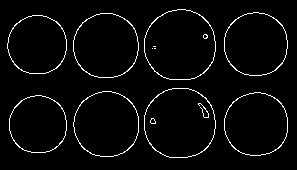

In [ ]:
def apply_canny_edge_detection(image):
    # Deteksi tepi menggunakan metode Canny
    edges = cv2.Canny(image, 100, 200)  # Tresholds: 100 dan 200 (boleh disesuaikan)

    return edges

# Terapkan deteksi tepi menggunakan Canny Edge Detection
edge_image = apply_canny_edge_detection(preprocessed_image)

# Tampilkan gambar tepi
cv2_imshow(edge_image)

# Lingkaran

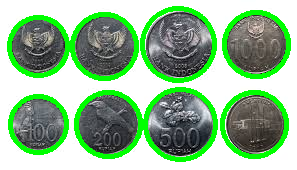

In [ ]:
def detect_circles(edge):
    # Deteksi lingkaran menggunakan Transformasi Hough Lingkaran
    circles = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, 1, 20,
                               param1=50, param2=30)

    return circles

# Deteksi lingkaran pada gambar
detected_circles = detect_circles(edge_image)

# Gambar lingkaran yang terdeteksi
detected_circles = np.uint16(np.around(detected_circles))
for circle in detected_circles[0, :]:
  center = (circle[0], circle[1])
  radius = circle[2]
  cv2.circle(image, center, radius, (0, 255, 0), 3)

# Tampilkan gambar dengan garis dan lingkaran yang terdeteksi
cv2_imshow(image)